#           Predicting Customer Response to Bank Marketing Campaigns

### Main Objective: Bank marketing Analysis using Machine Learning

- This is a Bank Marketing dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives information about a marketing campaign of a financial institution. We perform analysis on this dataset to find ways to look for strategies to improve future marketing campaigns for the bank.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("D:\\SEM II\\Machine Learning\\MLProj\\archive (9)\\bank-marketing.csv")            
df.head(10)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,other,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,other,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,other,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,other,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,other,no
5,35,management,100000,married,tertiary,yes,no,231,yes,no,unknown,5,may,139,1,-1,0,other,no
6,28,management,100000,single,tertiary,no,no,447,yes,yes,unknown,5,may,217,1,-1,0,other,no
7,42,entrepreneur,120000,divorced,tertiary,no,yes,2,yes,no,unknown,5,may,380,1,-1,0,other,no
8,58,retired,55000,married,primary,yes,no,121,yes,no,unknown,5,may,50,1,-1,0,other,no
9,43,technician,60000,single,secondary,yes,no,593,yes,no,unknown,5,may,55,1,-1,0,other,no


In [3]:
df.shape

(45211, 19)

In [4]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.describe(include=['O'])

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,2,3,12,3,2
top,blue-collar,married,secondary,yes,no,yes,no,cellular,may,other,no
freq,9732,27214,23202,37091,44396,25130,37967,29285,13766,38799,39922


## Find Missing Values

In [6]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

- No missing values were found

In [7]:
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
salary 11
marital 3
education 4
targeted 2
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 3
response 2


In [8]:
df1=df.copy()

## 'pdays' Analysis

- We exclude all the cases of -1 in pdays column. So, by doing this we can get only thoe customer who had previously taken part in a campaign.

In [9]:
df1.drop(df1[df1['pdays'] < 0].index, inplace = True) 

In [10]:
df1.shape

(8257, 19)

In [11]:
df1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

- Previously Mean was 40 and Median was -1 , now after limiting -1 values we have Mean as 224 and Median as 194.
This time Mean and Median has changed significantly because we have removed the case where pdays value is -1 i.e. we have removed the customer that were not contacted previously for campaign.

Text(0.5, 1.0, 'With filtering pdays column')


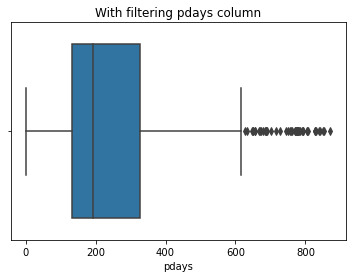

In [12]:
print(sns.boxplot(x=df1['pdays']).set_title('With filtering pdays column'))

- Removing outliers from 'pdays' column using IQR and Quantile Strategies

In [13]:
#A) check IQR strategy
Q1 = df1.pdays.quantile(0.25)
Q3 = df1.pdays.quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df2 = df1[(df1['pdays']<lower) | (df1['pdays']>upper)]

print("Number of Outliers Detected in pdays using strategy A:",df2.shape[0])

#B) check quantile strategy
max_val = df1['pdays'].quantile(0.95)        # df.Age.quantile(0.95)
min_val = df1['pdays'].quantile(0.05)        # df.Age.quantile(0.05)

df3 = df1[(df1['pdays']<min_val) | (df1['pdays']>max_val)]

print("Number of Outliers Detected in pdays using strategy B:",df3.shape[0])

Number of Outliers Detected in pdays using strategy A: 49
Number of Outliers Detected in pdays using strategy B: 786


- Since A gives smaller value, we go for IQR strategy. Now we replace the outliers with lower and upper values correspondingly

In [14]:
for i,data in df1.iterrows():
    if data['pdays']<lower:
        df1.at[i,'pdays']=lower  # random no in proper range
    elif data['pdays']>upper:
        df1.at[i,'pdays']=upper  # random no in proper range

AxesSubplot(0.125,0.125;0.775x0.755)


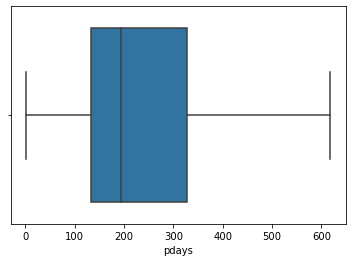

In [15]:
print(sns.boxplot(x=df1['pdays']))

## 'education' Analysis

In [16]:
#  Drop customer values with 'other' education
condition3 = (df1['education'] == 'other')
condition3

24060    False
24062    False
24064    False
24072    False
24077    False
         ...  
45199    False
45201    False
45204    False
45208    False
45210    False
Name: education, Length: 8257, dtype: bool

In [17]:
df1.shape

(8257, 19)

In [18]:
print(df1.groupby(['education'])['balance'].median())

education
primary      520
secondary    527
tertiary     775
unknown      782
Name: balance, dtype: int64


<AxesSubplot:ylabel='education'>

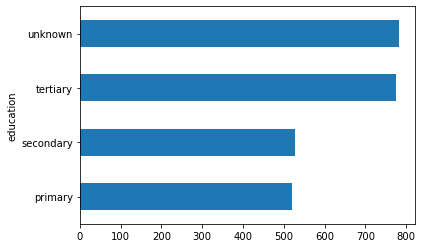

In [19]:
df1.groupby(['education'])['balance'].median().plot.barh()

- We can conclude from the graph that customer with tertiary level of education has highest median value for balance.

In [20]:
#bivariate analysis on job and education
df1[['job','education']] = df1[['job','education']].replace(['unknown'],'other')

## 'job' Analysis

In [21]:
df1["job"].unique()

array(['admin.', 'services', 'management', 'technician', 'blue-collar',
       'unemployed', 'entrepreneur', 'housemaid', 'retired',
       'self-employed', 'other', 'student'], dtype=object)

In [22]:
def initial_job(x):
    return x
job=df1["job"]

job=job.apply(initial_job)
job.value_counts()

management       1826
blue-collar      1617
technician       1342
admin.           1089
services          706
retired           488
student           285
self-employed     281
entrepreneur      225
unemployed        213
housemaid         152
other              33
Name: job, dtype: int64

<AxesSubplot:ylabel='job'>

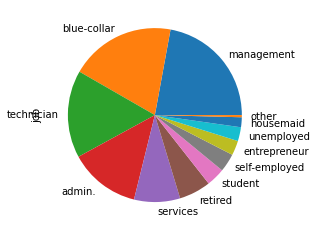

In [23]:
job.value_counts().plot(kind='pie')

## 'response' analysis

In [24]:
print(df1.response.value_counts())
print(df1.response.value_counts(normalize=True))

no     6352
yes    1905
Name: response, dtype: int64
no     0.769287
yes    0.230713
Name: response, dtype: float64


In [25]:
df1.replace({'response': {"yes": 1,'no':0}},inplace=True)

In [26]:
df1.response.value_counts()

0    6352
1    1905
Name: response, dtype: int64

## 'balance' Analysis

AxesSubplot(0.125,0.125;0.775x0.755)


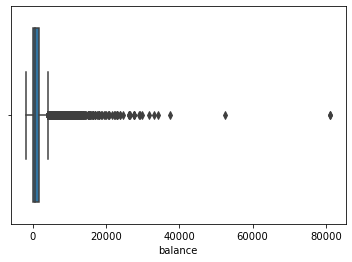

In [27]:
print(sns.boxplot(x=df1['balance']))

- Removing outliers from 'balance' column using IQR and Quantile Strategies

In [28]:
#A) check IQR strategy
Q1 = df1.balance.quantile(0.25)
Q3 = df1.balance.quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df2 = df1[(df1['balance']<lower) | (df1['balance']>upper)]

print("Number of Outliers Detected in balance using strategy A:",df2.shape[0])

#B) check quantile strategy
max_val = df1['balance'].quantile(0.95)        # df.Age.quantile(0.95)
min_val = df1['balance'].quantile(0.05)        # df.Age.quantile(0.05)

df3 = df1[(df1['balance']<min_val) | (df1['balance']>max_val)]

print("Number of Outliers Detected in balance using strategy B:",df3.shape[0])

Number of Outliers Detected in balance using strategy A: 806
Number of Outliers Detected in balance using strategy B: 825


- Since A gives smaller value go for IQR strategy. Now we replace the outliers with lower and upper values correspondingly

In [29]:
for i,data in df1.iterrows():
    if data['balance']<lower:
        df1.at[i,'balance']=lower  # random no in proper range
    elif data['balance']>upper:
        df1.at[i,'balance']=upper  # random no in proper range

AxesSubplot(0.125,0.125;0.775x0.755)


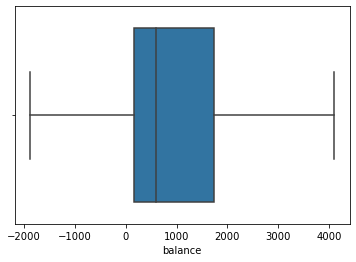

In [30]:
print(sns.boxplot(x=df1['balance']))

## 'age' Analysis

AxesSubplot(0.125,0.125;0.775x0.755)


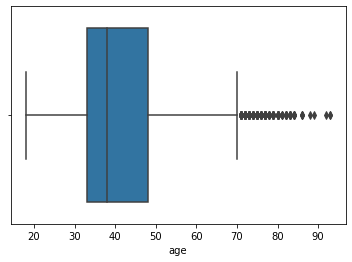

In [31]:
print(sns.boxplot(x=df1['age']))

- Removing outliers from 'age' column using IQR and Quantile Strategies

In [32]:
#A) check IQR strategy
Q1 = df1.age.quantile(0.25)
Q3 = df1.age.quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df2 = df1[(df1['age']<lower) | (df1['age']>upper)]

print("Number of Outliers Detected in age using strategy A:",df2.shape[0])

#B) check quantile strategy
max_val = df1['age'].quantile(0.95)        # df.Age.quantile(0.95)
min_val = df1['age'].quantile(0.05)        # df.Age.quantile(0.05)

df3 = df1[(df1['age']<min_val) | (df1['age']>max_val)]

print("Number of Outliers Detected in age using strategy B:",df3.shape[0])



Number of Outliers Detected in age using strategy A: 181
Number of Outliers Detected in age using strategy B: 768


- Since A gives smaller value go for IQR strategy. Now we replace the outliers with lower and upper values correspondingly

In [33]:
for i,data in df1.iterrows():
    if data['age']<lower:
        df1.at[i,'age']=lower  # random no in proper range
    elif data['age']>upper:
        df1.at[i,'age']=upper  # random no in proper range

AxesSubplot(0.125,0.125;0.775x0.755)


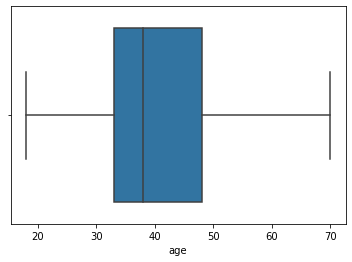

In [34]:
print(sns.boxplot(x=df1['age']))

## Exploring Categorical Features

In [35]:
categorical_features=[feature for feature in df1.columns if ((df1[feature].dtypes=='O'))]
categorical_features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df1[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is targeted and number of categories are 2
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 3


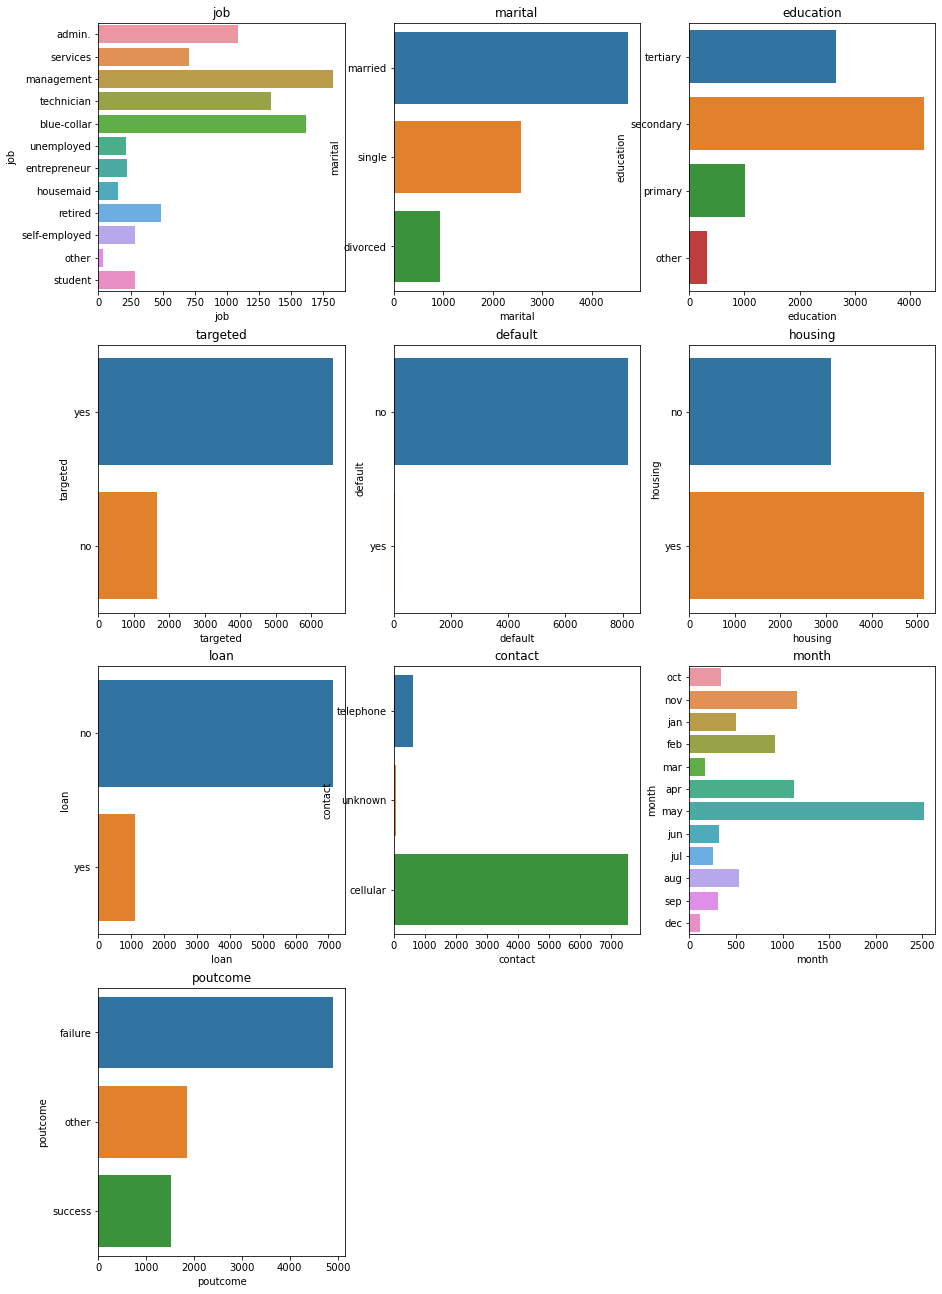

In [36]:
#check count based on categorical features
plt.figure(figsize=(15,70), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df1)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

### Visualizing the distribution of 'age' and 'balance

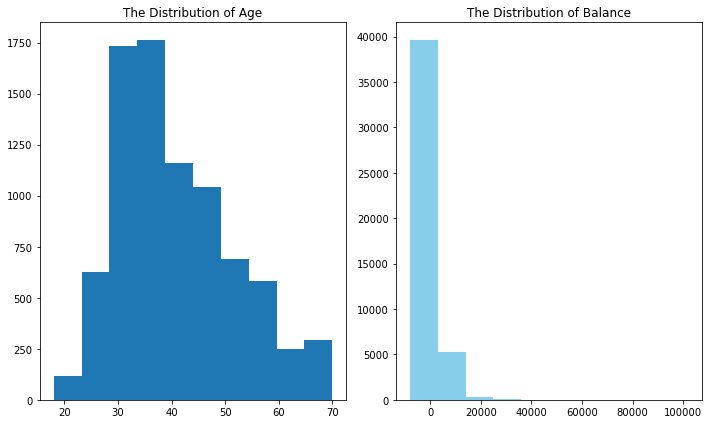

In [37]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(df1['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(df['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

- The distribution of customer age is fairly normal with a small standard deviation.
- The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.

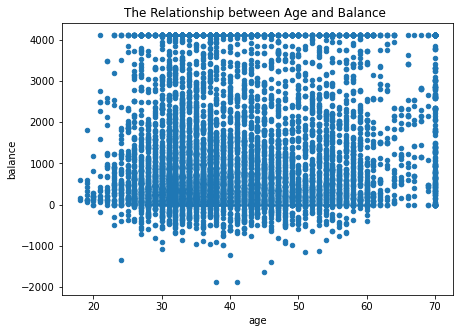

In [38]:
scatter_age_balance = df1.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

- Over the age of 60, clients tend to have a significantly lower balance. This is due to the fact that most people retire after age 60 and no longer have a reliable income source.

## Visualize the subscription and contact rate by age

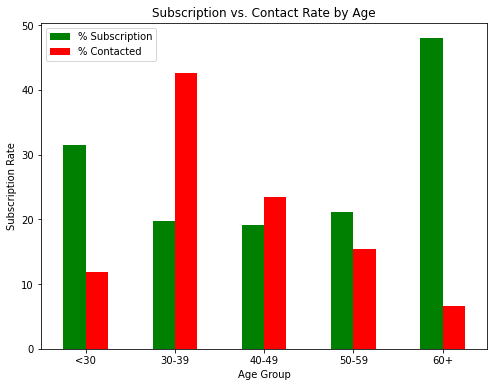

In [39]:
lst = [df1]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

count_age_response_pct = pd.crosstab(df1['response'],df1['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(df1['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct[1]
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

- Green vertical bars indicate that clients with a age of 60+ have the highest subscription rate. More than 50% of the subscriptions are contributed by the youngest and the eldest clients.

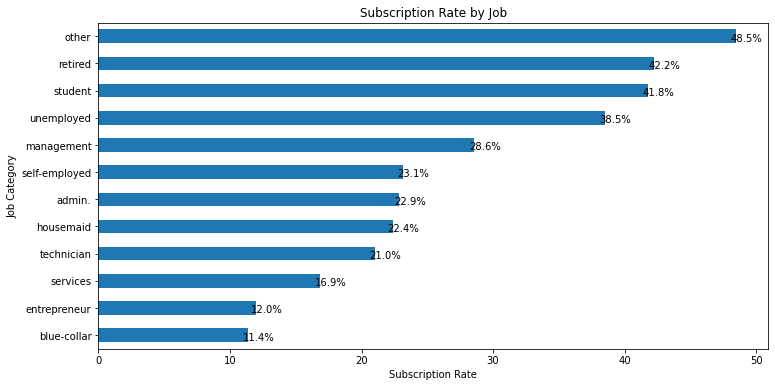

In [40]:
count_job_response_pct = pd.crosstab(df1['response'],df1['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()
plot_job = count_job_response_pct[1].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[1].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

- As noted from the horizontal bar chart,retired and students account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.

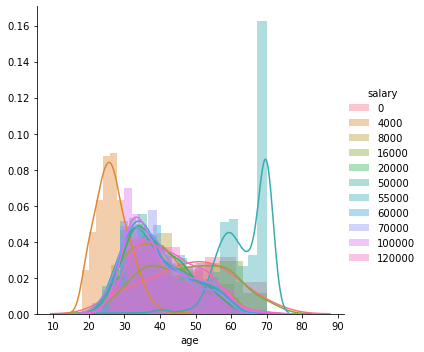

In [41]:
sns.FacetGrid(df1,hue='salary',size=5).map(sns.distplot,"age").add_legend()

- High salary is concentrated in age groip 30-50 which is the workig age group.
- Moderate salary is observed  in age group 55-70 which is the retired age group.
- Low salary is observed in the age group 15-25 which is the age-group of students.

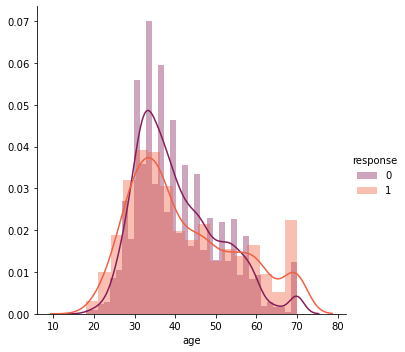

In [42]:
sns.FacetGrid(df1,palette='rocket',hue='response',size=5).map(sns.distplot,"age").add_legend()

- Here we can see that most people from age group 25-45 responded positively to the Marketing campaign

## Encoding 

In [43]:
#using one-hot-encoding on categorical variables
df1["job"]=df1["job"].astype('category')
df1["job_encode"]=df1["job"].cat.codes

df1["marital"]=df1["marital"].astype('category')
df1["marital_encode"]=df1["marital"].cat.codes

df1["education"]=df1["education"].astype('category')
df1["education_encode"]=df1["education"].cat.codes

df1["targeted"]=df1["targeted"].astype('category')
df1["targeted_encode"]=df1["targeted"].cat.codes

df1["default"]=df1["default"].astype('category')
df1["default_encode"]=df1["default"].cat.codes

df1["housing"]=df1["housing"].astype('category')
df1["housing_encode"]=df1["housing"].cat.codes

df1["loan"]=df1["loan"].astype('category')
df1["loan_encode"]=df1["loan"].cat.codes

df1["contact"]=df1["contact"].astype('category')
df1["contact_encode"]=df1["contact"].cat.codes

df1["month"]=df1["month"].astype('category')
df1["month_encode"]=df1["month"].cat.codes

df1["poutcome"]=df1["poutcome"].astype('category')
df1["poutcome_encode"]=df1["poutcome"].cat.codes

In [44]:
df1.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response', 'age_group',
       'job_encode', 'marital_encode', 'education_encode', 'targeted_encode',
       'default_encode', 'housing_encode', 'loan_encode', 'contact_encode',
       'month_encode', 'poutcome_encode'],
      dtype='object')

In [45]:
df1.shape

(8257, 30)

In [46]:
df1.head(10)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,...,job_encode,marital_encode,education_encode,targeted_encode,default_encode,housing_encode,loan_encode,contact_encode,month_encode,poutcome_encode
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,...,0,1,3,1,0,0,0,1,10,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,...,0,2,2,1,0,1,1,1,10,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,...,8,1,2,1,0,1,0,1,10,0
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,...,4,1,3,1,0,1,0,1,10,1
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,...,4,1,3,1,0,1,0,1,10,0
24080,56,technician,60000,married,secondary,yes,no,589,yes,no,...,10,1,2,1,0,1,0,2,10,2
24086,44,blue-collar,20000,married,secondary,yes,no,1324,yes,no,...,1,1,2,1,0,1,0,1,10,1
24122,26,technician,60000,single,tertiary,no,no,172,no,yes,...,10,2,3,0,0,0,1,1,9,1
24127,51,admin.,50000,single,secondary,yes,no,3132,no,no,...,0,2,2,1,0,0,0,1,9,0
24136,34,management,100000,married,tertiary,yes,no,1770,yes,no,...,4,1,3,1,0,1,0,2,9,1


In [47]:
#dropping all the extra variables and keeping only neccessary ones
drop_elements=['job', 'marital', 'education', 'targeted', 'default','housing', 'loan', 'contact', 'month', 'poutcome','age_group']
df1clean=df1.drop(drop_elements,axis=1)

In [48]:
df1clean.head(10)

,age,salary,balance,day,duration,campaign,pdays,previous,response,job_encode,marital_encode,education_encode,targeted_encode,default_encode,housing_encode,loan_encode,contact_encode,month_encode,poutcome_encode
24060,33,50000,882,21,39,1,151,3,0,0,1,3,1,0,0,0,1,10,0
24062,42,50000,-247,21,519,1,166,1,1,0,2,2,1,0,1,1,1,10,1
24064,33,70000,3444,21,144,1,91,4,1,8,1,2,1,0,1,0,1,10,0
24072,36,100000,2415,22,73,1,86,4,0,4,1,3,1,0,1,0,1,10,1
24077,36,100000,0,23,140,1,143,3,1,4,1,3,1,0,1,0,1,10,0
24080,56,60000,589,23,518,1,147,2,1,10,1,2,1,0,1,0,2,10,2
24086,44,20000,1324,25,119,1,89,2,0,1,1,2,1,0,1,0,1,10,1
24122,26,60000,172,4,21,1,140,4,0,10,2,3,0,0,0,1,1,9,1
24127,51,50000,3132,5,449,1,176,1,0,0,2,2,1,0,0,0,1,9,0
24136,34,100000,1770,6,26,1,101,11,0,4,1,3,1,0,1,0,2,9,1


In [49]:
df1clean.shape

(8257, 19)

In [50]:
#checking for negative values in cleaded dataframe
sum(n<0 for n in df1clean.values.flatten())

488

In [51]:
#replacing the negative values with 0
df1clean[df1clean<0]=0

In [52]:
#saving cleaned data in csv format to df1clean dataset
df1clean.to_csv("D:\\SEM II\\Machine Learning\\MLProj\\archive (9)\\df1clean.csv")

In [53]:
df1clean=pd.read_csv("D:\\SEM II\\Machine Learning\\MLProj\\archive (9)\\df1clean.csv",header=0)
df1clean = df1clean.drop(['Unnamed: 0'], axis=1)
df1clean.head(10)

,age,salary,balance,day,duration,campaign,pdays,previous,response,job_encode,marital_encode,education_encode,targeted_encode,default_encode,housing_encode,loan_encode,contact_encode,month_encode,poutcome_encode
0,33,50000,882,21,39,1,151,3,0,0,1,3,1,0,0,0,1,10,0
1,42,50000,0,21,519,1,166,1,1,0,2,2,1,0,1,1,1,10,1
2,33,70000,3444,21,144,1,91,4,1,8,1,2,1,0,1,0,1,10,0
3,36,100000,2415,22,73,1,86,4,0,4,1,3,1,0,1,0,1,10,1
4,36,100000,0,23,140,1,143,3,1,4,1,3,1,0,1,0,1,10,0
5,56,60000,589,23,518,1,147,2,1,10,1,2,1,0,1,0,2,10,2
6,44,20000,1324,25,119,1,89,2,0,1,1,2,1,0,1,0,1,10,1
7,26,60000,172,4,21,1,140,4,0,10,2,3,0,0,0,1,1,9,1
8,51,50000,3132,5,449,1,176,1,0,0,2,2,1,0,0,0,1,9,0
9,34,100000,1770,6,26,1,101,11,0,4,1,3,1,0,1,0,2,9,1


<AxesSubplot:>

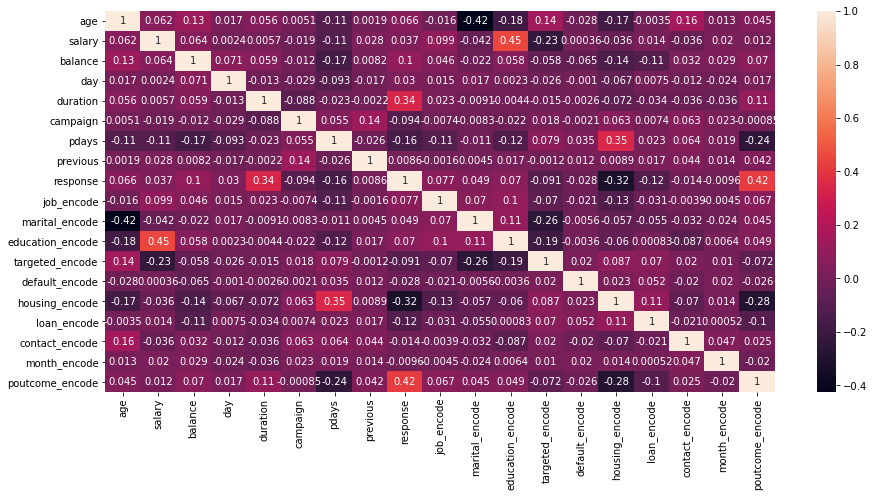

In [54]:
#heatmap showing correlation between variables
cor_mat=df1clean.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

#### - Here we can see that no two variables are highly correlated.So, we can make models including all the variables.


In [55]:
correlation=df1clean.corr()
correlation

,age,salary,balance,day,duration,campaign,pdays,previous,response,job_encode,marital_encode,education_encode,targeted_encode,default_encode,housing_encode,loan_encode,contact_encode,month_encode,poutcome_encode
age,1.000000,0.062427,0.132385,0.016893,0.056218,0.005076,-0.106570,0.001942,0.065881,-0.015738,-0.422797,-0.175497,0.144305,-0.027840,-0.170224,-0.003454,0.155722,0.013377,0.045050
salary,0.062427,1.000000,0.064369,0.002379,0.005734,-0.018559,-0.109139,0.028427,0.036774,0.099467,-0.042212,0.449814,-0.228338,0.000361,-0.035905,0.013788,-0.035805,0.019820,0.012361
balance,0.132385,0.064369,1.000000,0.071019,0.058883,-0.011926,-0.166131,0.008196,0.102309,0.045549,-0.022346,0.057636,-0.057809,-0.065445,-0.137955,-0.105280,0.031775,0.028637,0.069919
day,0.016893,0.002379,0.071019,1.000000,-0.012687,-0.029295,-0.093406,-0.016801,0.029952,0.015001,0.016797,0.002345,-0.026179,-0.001013,-0.066740,0.007550,-0.012330,-0.024264,0.016524
duration,0.056218,0.005734,0.058883,-0.012687,1.000000,-0.088394,-0.022994,-0.002150,0.342610,0.023311,-0.009075,-0.004359,-0.014729,-0.002635,-0.072070,-0.033874,-0.036360,-0.036446,0.108196
campaign,0.005076,-0.018559,-0.011926,-0.029295,-0.088394,1.000000,0.055118,0.135523,-0.094110,-0.007439,-0.008338,-0.021744,0.017948,-0.002064,0.063071,0.007444,0.063199,0.023224,-0.000846
pdays,-0.106570,-0.109139,-0.166131,-0.093406,-0.022994,0.055118,1.000000,-0.025703,-0.159009,-0.108616,-0.010550,-0.123602,0.079068,0.035301,0.345404,0.022999,0.063660,0.018843,-0.241369
previous,0.001942,0.028427,0.008196,-0.016801,-0.002150,0.135523,-0.025703,1.000000,0.008622,-0.001618,0.004536,0.016646,-0.001205,0.012149,0.008934,0.016549,0.043830,0.013977,0.041648
response,0.065881,0.036774,0.102309,0.029952,0.342610,-0.094110,-0.159009,0.008622,1.000000,0.076806,0.049234,0.070002,-0.091216,-0.028299,-0.317501,-0.115805,-0.014321,-0.009586,0.421075
job_encode,-0.015738,0.099467,0.045549,0.015001,0.023311,-0.007439,-0.108616,-0.001618,0.076806,1.000000,0.069830,0.101816,-0.070294,-0.020895,-0.128064,-0.030660,-0.003929,-0.004465,0.066998


## Train-Test Split

In [56]:
X=df1clean.drop('response',axis=1) #all feature variables
y=df1clean["response"]             #only target variable

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=1)

In [58]:
print("\n X_train:",len(X_train),"\n X_test:",len(X_test),"\n y_train:",len(y_train),"\n y_test:",len(y_test))


 X_train: 5779 
 X_test: 2478 
 y_train: 5779 
 y_test: 2478


## K Best Feature Selection 

In [59]:
#select features that are best and important for analysis
from sklearn.feature_selection import SelectKBest, chi2, f_regression
K_best=SelectKBest(score_func=chi2,k=5).fit_transform(X_train,y_train)
K_best[:10]

array([[ 60000,    111,    178,    183,      1],
       [ 60000,    202,    107,    148,      0],
       [ 60000,      0,    138,    164,      1],
       [ 20000,   1407,    112,    370,      0],
       [ 16000,   3232,    541,    204,      0],
       [ 55000,   4105,    212,    188,      2],
       [ 20000,      0,    255,    356,      1],
       [ 50000,   4105,    286,    168,      0],
       [ 20000,   2580,   1691,    264,      0],
       [100000,   3371,    187,    178,      2]], dtype=int64)

In [60]:
# Compare the newly created values with feature set values to know the selected features
X_train.head(10)

,age,salary,balance,day,duration,campaign,pdays,previous,job_encode,marital_encode,education_encode,targeted_encode,default_encode,housing_encode,loan_encode,contact_encode,month_encode,poutcome_encode
501,46,60000,111,19,178,3,183,2,10,0,2,1,0,1,0,0,9,1
2228,50,60000,202,15,107,1,148,4,7,1,3,1,0,1,0,0,0,0
1176,31,60000,0,29,138,2,164,4,10,0,2,1,0,0,0,0,4,1
4511,60,20000,1407,14,112,1,370,1,1,1,2,1,0,1,0,0,8,0
8063,47,16000,3232,6,541,1,204,3,3,2,3,0,0,0,0,1,10,0
7858,61,55000,4105,18,212,7,188,3,6,1,3,1,0,0,0,0,1,2
4515,30,20000,0,14,255,1,356,1,1,1,2,1,0,1,1,0,8,1
3705,53,50000,4105,8,286,2,168,3,0,1,2,1,0,0,0,0,8,0
2130,38,20000,2580,8,1691,2,264,3,1,2,2,1,0,1,0,0,0,0
7042,62,100000,3371,25,187,1,178,2,4,1,3,1,0,0,0,0,7,2


From the above two outputs we see that the best five predictors for response variables are:
- salary
- balance
- duration
- pdays
- poutcome_encode

In [61]:
from sklearn.feature_selection import SelectKBest
predictors=X_train.head(0)
selector=SelectKBest(chi2,k=5)
sf_fit=selector.fit(X_train,y_train)
#print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X_train.columns[i], sf_fit.scores_[i]))

 age: 74.688210
 salary: 97139.560486
 balance: 105598.398399
 day: 22.411866
 duration: 137941.935541
 campaign: 60.087821
 pdays: 8371.441529
 previous: 2.243719
 job_encode: 74.907717
 marital_encode: 5.204168
 education_encode: 7.648928
 targeted_encode: 9.489017
 default_encode: 2.981369
 housing_encode: 218.639814
 loan_encode: 71.269517
 contact_encode: 2.001701
 month_encode: 3.109002
 poutcome_encode: 1036.541176


<function matplotlib.pyplot.show(close=None, block=None)>

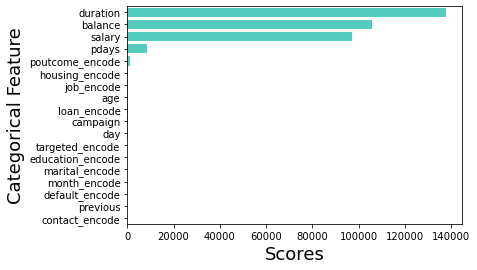

In [62]:
#plotting k-best features using bar graph
dataset=pd.DataFrame()
dataset['feature']=X.columns[range(len(sf_fit.scores_))]
dataset['scores']=sf_fit.scores_
dataset=dataset.sort_values(by='scores',ascending=False)
sns.barplot(dataset['scores'],dataset['feature'],color='turquoise')
plt.xlabel('Scores',fontsize=18)
plt.ylabel('Categorical Feature', fontsize=18)
plt.show

## Predictive Models

## 1. Logistic Regression Model

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [64]:
from sklearn.model_selection import cross_val_score
cv_score1= cross_val_score(lr,X_train,y_train, cv=5)
print("Mean CV score for Logistic Regression is",np.mean(cv_score1))

Mean CV score for Logistic Regression is 0.7736640752557709


In [65]:
print("Cross validation accuracy scores: %s" %cv_score1)
print('Mean:',np.mean(cv_score1),' Stdev:',np.std(cv_score1))

Cross validation accuracy scores: [0.76730104 0.76470588 0.77941176 0.77854671 0.77835498]
Mean: 0.7736640752557709  Stdev: 0.0063185143463702735


In [66]:
from sklearn.metrics import f1_score
y_pred1 = lr.predict(X_test)
print("f1 score for Test set is",f1_score(y_pred1,y_test))

f1 score for Test set is 0.28808864265927975


In [67]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#confusion matrix of Test data
result=confusion_matrix(y_test,y_pred1)
print("Confusion Matrix:")
index=['Actual No','Actual yes']
columns=['Predicted no','Predicted yes']
demo=pd.DataFrame(result,index=index,columns=columns)
print(demo)

#classification report for Test data
result1=classification_report(y_test,y_pred1)
print("\nClassification:")
print(result1)

#accuracy of Test data
result_lr=accuracy_score(y_test,y_pred1)
print("Accuracy:",result_lr)


Confusion Matrix:
            Predicted no  Predicted yes
Actual No           1860             80
Actual yes           434            104

Classification:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1940
           1       0.57      0.19      0.29       538

    accuracy                           0.79      2478
   macro avg       0.69      0.58      0.58      2478
weighted avg       0.76      0.79      0.75      2478

Accuracy: 0.7925746569814366


## 2. Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#random_state=42,max_leaf_nodes=50

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=100,max_depth=5))
#rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5))])

In [70]:
cv_score2= cross_val_score(rfc,X_train,y_train, cv=5,n_jobs=10)
print("Mean CV score for Random Forest Classifier is",np.mean(cv_score2))

Mean CV score for Random Forest Classifier is 0.8354382180679758


In [71]:
print("Cross validation accuracy scores: %s" %cv_score2)
print('Mean:',np.mean(cv_score2),' Stdev:',np.std(cv_score2))

Cross validation accuracy scores: [0.83044983 0.83477509 0.84256055 0.83650519 0.83290043]
Mean: 0.8354382180679758  Stdev: 0.0040897490448432465


In [72]:
from sklearn.metrics import f1_score
y_pred2 = rfc.predict(X_test)
print("f1 score for Test set is",f1_score(y_test,y_pred2))

f1 score for Test set is 0.5452352231604343


In [73]:
#confusion matrix of Test data
result=confusion_matrix(y_test,y_pred2)
print("Confusion Matrix:")
index=['Actual No','Actual yes']
columns=['Predicted no','Predicted yes']
demo=pd.DataFrame(result,index=index,columns=columns)
print(demo)

#classification report for Test data
result1=classification_report(y_test,y_pred2)
print("\nClassification:")
print(result1)

#accuracy of Test data
result_rfc=accuracy_score(y_test,y_pred2)
print("Accuracy:",result_rfc)


Confusion Matrix:
            Predicted no  Predicted yes
Actual No           1875             65
Actual yes           312            226

Classification:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1940
           1       0.78      0.42      0.55       538

    accuracy                           0.85      2478
   macro avg       0.82      0.69      0.73      2478
weighted avg       0.84      0.85      0.83      2478

Accuracy: 0.8478611783696529


## 2. SVM

In [74]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel="poly",degree=8)
svm_classifier.fit(X_train,y_train)

SVC(degree=8, kernel='poly')

In [75]:
from sklearn.model_selection import cross_val_score
cv_score3= cross_val_score(svm_classifier,X_train,y_train, cv=5)
print("Mean CV score for SVM is",np.mean(cv_score3))

Mean CV score for SVM is 0.7634539163258887


In [76]:
print("Cross validation accuracy scores: %s" %cv_score3)
print('Mean:',np.mean(cv_score3),' Stdev:',np.std(cv_score3))

Cross validation accuracy scores: [0.76384083 0.76470588 0.76211073 0.76297578 0.76363636]
Mean: 0.7634539163258887  Stdev: 0.000869848578981626


In [77]:
y_pred3 = svm_classifier.predict(X_test)
print("f1 score for Test set is",f1_score(y_test,y_pred3))

f1 score for Test set is 0.007366482504604051


In [78]:
#confusion matrix of Test data
result=confusion_matrix(y_test,y_pred3)
print("Confusion Matrix:")
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
demo=pd.DataFrame(result,index=index,columns=columns)
print(demo)

#classification report for Test data
result1=classification_report(y_test,y_pred3)
print("\nClassification:")
print(result1)

#accuracy of Test data
result_svm=accuracy_score(y_test,y_pred3)
print("Accuracy:",result_svm)


Confusion Matrix:
            predicted no  predicted yes
actual No           1937              3
actual yes           536              2

Classification:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1940
           1       0.40      0.00      0.01       538

    accuracy                           0.78      2478
   macro avg       0.59      0.50      0.44      2478
weighted avg       0.70      0.78      0.69      2478

Accuracy: 0.7824858757062146


* Random Forest Classifier is the best performing model.

- Among all algorithms,Random Forest Classifier achieved an accuracy of about 84.9%, suggesting a high level of strength of this model to classify the customer response with respect to all the defined customer features.

### Overall Camprison of Models

In [79]:
from sklearn.model_selection import KFold
models = []#empty list for models
models.append(('LR', LogisticRegression()))
models.append(('RFC',RandomForestClassifier()))
models.append(('SVM',SVC()))

results= []#empty list for result values
names= []#empty list for model names

for name, model in models:
    # defining number of folds for splitting)
    kfold = KFold(n_splits=5, random_state=125)    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.776952 (0.016398)
RFC: 0.846860 (0.004902)
SVM: 0.763454 (0.014486)


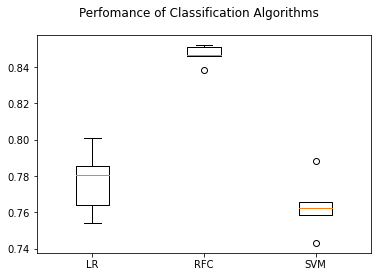

In [80]:
#plotting the models using boxplot
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- It is clearly seen that Random Forest Classifier is the best performing model compared to Logistic Regression and even SVM, which is supposed to give better results comparatively.

## Thank You!!